In [2]:
cg = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
mol = Table.read('../molclouds.txt',format='ascii')

### Select clouds from catalog based on distance

In [3]:
def cloudlim(n):
    q = np.where((cg['gl'] > mol['llower'][n]) & (cg['gl'] < mol['lupper'][n]) & (cg['gb'] > mol['blower'][n]) & (cg['gb'] > mol['bupper'][n]))# & (cg['dist'] > mol['dist'][n]-100) & (cg['dist'] < mol['dist'][n]+100))
    return q
c0 = cg[cloudlim(0)]
c1 = cg[cloudlim(1)]
c2 = cg[cloudlim(2)]
c3 = cg[cloudlim(3)]
c4 = cg[cloudlim(4)]
c5 = cg[cloudlim(5)]
c6 = cg[cloudlim(6)]
c7 = cg[cloudlim(7)]
c8 = cg[cloudlim(8)]
c9 = cg[cloudlim(9)]
c10 = cg[cloudlim(10)]
c11 = cg[cloudlim(11)]
c12 = cg[cloudlim(12)]
c13 = cg[cloudlim(13)]
cs = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13])

In [4]:
print(mol['name'][0]+' = '+str(len(c0)))
print(mol['name'][1]+' = '+str(len(c1)))
print(mol['name'][2]+' = '+str(len(c2)))
print(mol['name'][3]+' = '+str(len(c3)))
print(mol['name'][4]+' = '+str(len(c4)))
print(mol['name'][5]+' = '+str(len(c5)))
print(mol['name'][6]+' = '+str(len(c6)))
print(mol['name'][7]+' = '+str(len(c7)))
print(mol['name'][8]+' = '+str(len(c8)))
print(mol['name'][9]+' = '+str(len(c9)))
print(mol['name'][10]+' = '+str(len(c10)))
print(mol['name'][11]+' = '+str(len(c11)))
print(mol['name'][12]+' = '+str(len(c12)))
print(mol['name'][13]+' = '+str(len(c13)))

CMaOB1 = 36138
California = 39552
CepheusFar = 0
CepheusNear = 0
Crossbones = 25013
GemOB1 = 5552
Hercules = 264
Lacerta = 21916
Lupus = 0
Maddalena = 32341
MonOB1 = 22318
OrionLam = 32878
Rosette = 37923
SerpensAqR = 1759


In [5]:
areas = (mol['lupper']-mol['llower'])*(mol['bupper']-mol['blower'])

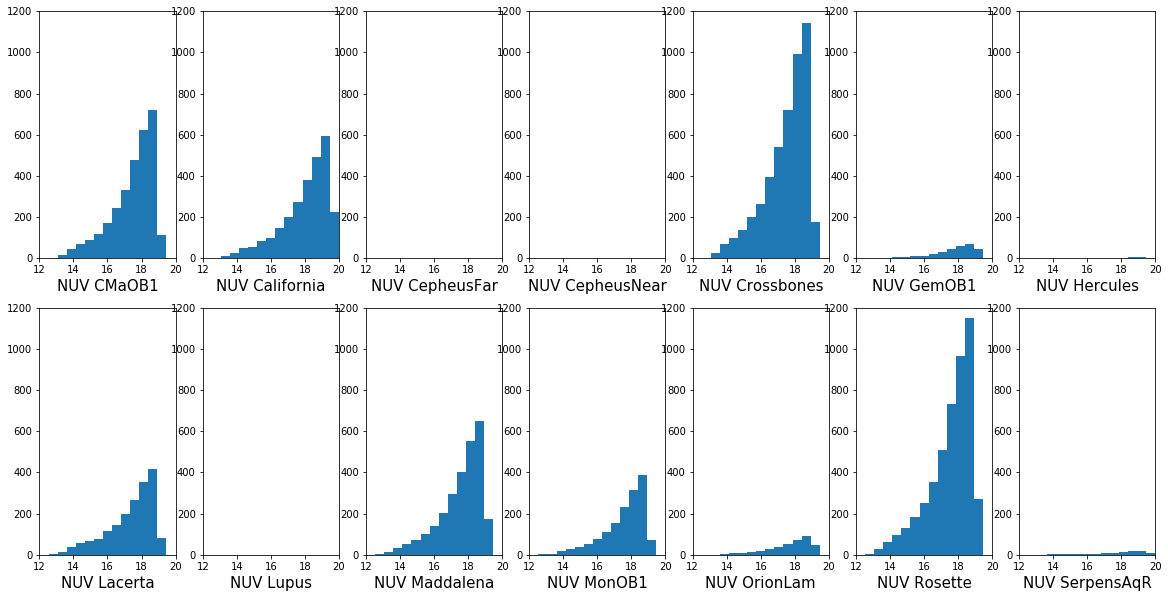

In [9]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 15):
    ax = fig.add_subplot(2, 7, i)
    cat = cs[i-1]
    x, bins, p = plt.hist(cat['nuv'], range=[12, 20], bins=15)
    for item in p:
        item.set_height(item.get_height()/areas[i-1])
    plt.xlim(12, 20)
    plt.ylim(0, 1200)
    plt.xlabel('NUV '+mol['name'][i-1], fontsize=15)
plt.show()

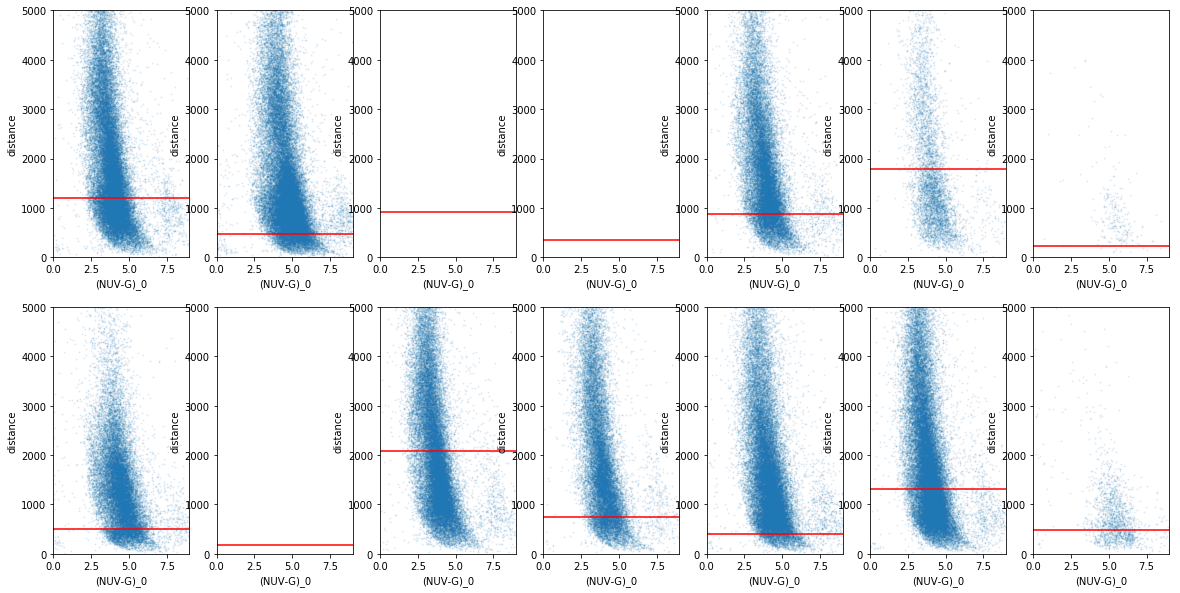

In [16]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 15):
    ax = fig.add_subplot(2, 7, i)
    cat = cs[i-1]
    #plt.scatter((cat['nuv']-cat['ebv']*7.24)-(cat['phot_g_mean_mag']-cat['ebv']*2.85), cat['dist'],c=cat['phot_g_mean_mag']-cat['distmod'], s=1, alpha=0.1)
    plt.scatter((cat['nuv'])-(cat['phot_g_mean_mag']), cat['dist'], s=1, alpha=0.1)

    plt.xlabel('(NUV-G)_0')
    plt.ylabel('distance')
    plt.xlim(0, 9)
    plt.ylim(0, 5000)
    plt.axhline(y=mol['dist'][i-1], c='red')
plt.show()

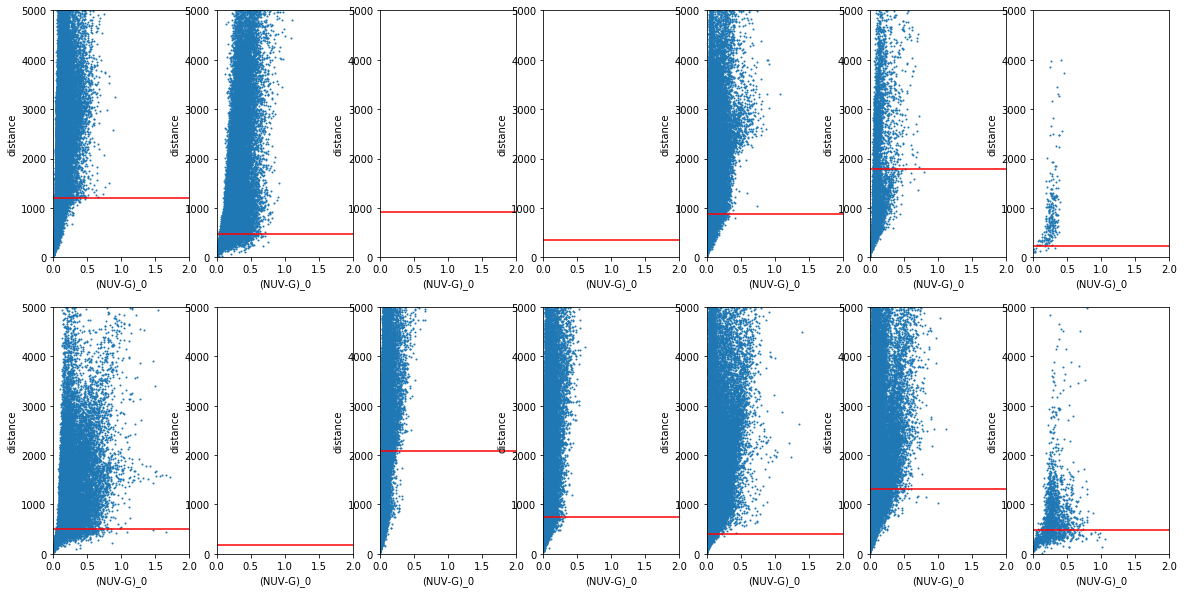

In [22]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 15):
    ax = fig.add_subplot(2, 7, i)
    cat = cs[i-1]
    #plt.scatter((cat['nuv']-cat['ebv']*7.24)-(cat['phot_g_mean_mag']-cat['ebv']*2.85), cat['dist'],c=cat['phot_g_mean_mag']-cat['distmod'], s=1, alpha=0.1)
    plt.scatter(cat['ebv'], cat['dist'], s=1)

    plt.xlabel('(NUV-G)_0')
    plt.ylabel('distance')
    plt.xlim(0, 2)
    plt.ylim(0, 5000)
    plt.axhline(y=mol['dist'][i-1], c='red')
plt.show()

In [17]:
mol

name,llower,lupper,blower,bupper,ebv,dist,d_err_stat,d_err_syst
str11,float64,float64,float64,float64,float64,float64,float64,float64
CMaOB1,223.0,227.0,-3.0,0.0,2.0,1209.0,4.0,60.0
California,160.0,166.0,-10.0,-7.5,1.0,470.0,2.0,24.0
CepheusFar,97.5,115.0,9.5,21.0,0.75,923.0,1.0,46.0
CepheusNear,97.5,115.0,9.5,21.0,0.75,352.0,1.0,18.0
Crossbones,218.5,220.0,-11.0,-7.5,1.0,886.0,4.0,44.0
GemOB1,188.5,193.5,-1.0,2.5,2.0,1786.0,4.0,89.0
Hercules,42.0,47.0,7.5,10.0,0.5,227.0,1.0,11.0
Lacerta,94.0,97.0,-12.0,-8.0,0.5,503.0,5.0,25.0
Lupus,335.0,348.0,5.0,19.0,1.0,189.0,9.0,9.0
